In [4]:
pip install tensorflow numpy matplotlib


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


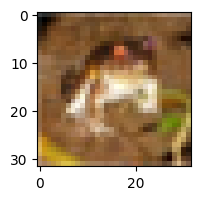

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [7]:
# Display the first image in the training set
plt.figure(figsize=(2,2))
plt.imshow(train_images[0])
plt.show()

# Display the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')


In [8]:
model = models.Sequential()

# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Fully connected (Dense) layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (for the 10 classes)
model.add(layers.Dense(10))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 57ms/step - accuracy: 0.3449 - loss: 1.7636 - val_accuracy: 0.5463 - val_loss: 1.2647
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 54ms/step - accuracy: 0.5650 - loss: 1.2171 - val_accuracy: 0.6054 - val_loss: 1.1176
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 57ms/step - accuracy: 0.6388 - loss: 1.0283 - val_accuracy: 0.6457 - val_loss: 1.0148
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 51ms/step - accuracy: 0.6743 - loss: 0.9284 - val_accuracy: 0.6757 - val_loss: 0.9362
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.7081 - loss: 0.8405 - val_accuracy: 0.6975 - val_loss: 0.8880
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.7272 - loss: 0.7753 - val_accuracy: 0.6984 - val_loss: 0.8703
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.7451 - loss: 0.7291 - val_accuracy: 0.6854 - val_loss: 0.9327
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.75

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 4s - 12ms/step - accuracy: 0.7080 - loss: 0.8645
Test accuracy: 0.7080000042915344


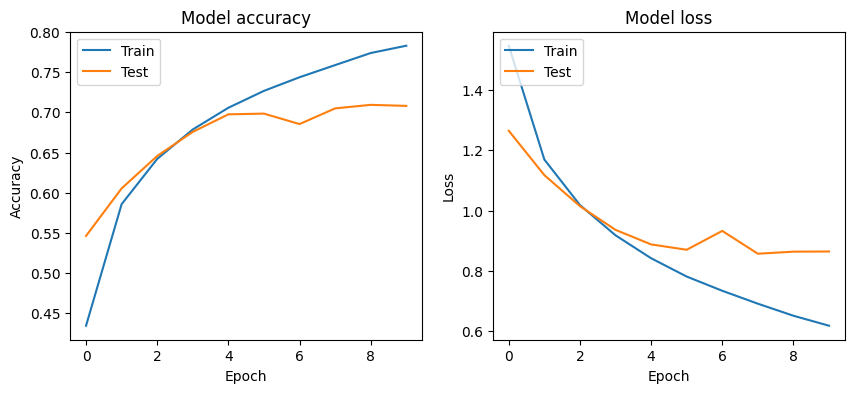

In [12]:
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


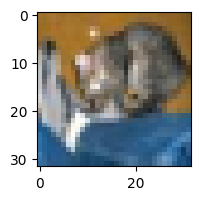

Predicted label: 8


In [13]:
# Predict on the test images
predictions = model.predict(test_images)

# Display the first test image and the predicted label
plt.figure(figsize=(2,2))
plt.imshow(test_images[0])
plt.show()

predicted_label = np.argmax(predictions[0])
print(f'Predicted label: {predicted_label}')


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit the model on the augmented dataset
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(test_images, test_labels))
# Save the trained model
model.save('cnn_model.h5')


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 81ms/step - accuracy: 0.6848 - loss: 0.8926 - val_accuracy: 0.7419 - val_loss: 0.7623
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 78ms/step - accuracy: 0.6962 - loss: 0.8678 - val_accuracy: 0.7265 - val_loss: 0.8003
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.6942 - loss: 0.8782 - val_accuracy: 0.7127 - val_loss: 0.8977
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6965 - loss: 0.8663 - val_accuracy: 0.7410 - val_loss: 0.7581
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6959 - loss: 0.8728 - val_accuracy: 0.7511 - val_loss: 0.7194
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.7003 - loss: 0.8606 - val_accuracy: 0.7445 - val_loss: 0.7422
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6991 - loss: 0.8606 - val_accuracy: 0.7285 - val_loss: 0.7947
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 

In [18]:
!pip install streamlit
!pip install pyngrok


In [31]:
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('cnn_model.h5')

# Streamlit interface
st.title("Image Classification with CNN")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    image = image.resize((32, 32))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)

    # Predict
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])

    st.write(f"Predicted Class: {predicted_class}")


2024-09-24 10:21:39.512 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 10:21:39.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 10:21:39.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 10:21:39.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 10:21:39.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-24 10:21:39.525 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [32]:
%%writefile streamlit_app.py

import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('cnn_model.h5')

# Streamlit interface
st.title("Image Classification with CNN")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    image = image.resize((32, 32))
    image = np.array(image)
    image = np.expand_dims(image, axis=0)

    # Predict
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions[0])

    st.write(f"Predicted Class: {predicted_class}")


Overwriting streamlit_app.py


In [33]:
!ls


cnn_model.h5  image-classification-using-cnn  sample_data  streamlit_app.py


In [34]:
from pyngrok import ngrok

# Start the Streamlit app
!streamlit run streamlit_app.py &

# Explicitly specify the protocol and port for the tunnel
public_url = ngrok.connect(addr="8501", proto="http")
print(f"Streamlit app is live at {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.184.233.137:8501

  Stopping...
Streamlit app is live at NgrokTunnel: "https://09bd-35-184-233-137.ngrok-free.app" -> "http://localhost:8501"


In [35]:
!streamlit run streamlit_app.py &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.184.233.137:8501

2024-09-24 10:25:10.761649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 10:25:10.807881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 10:25:10.823813: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 10:25:13.152252: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 